# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Task - 1 

In [ ]:
X =df['Mileage'].values.reshape(-1,1)
y= df['Price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.30, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [ ]:
print('coefficient : ', reg.coef_)
print('Intercept : ',reg.intercept_)

coefficient :  [-0.15275894]
Intercept :  24415.28280468836


In [ ]:
# Upgrade matplotlib in Colab
#!pip install matplotlib --upgrade

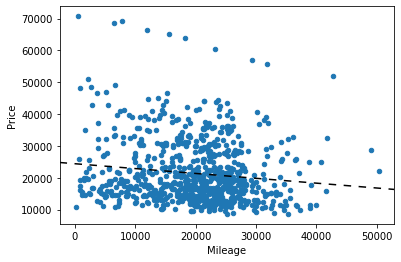

In [ ]:
# Plotting
df.plot(x='Mileage',y = 'Price', kind = 'scatter')
m = reg.coef_
b = reg.intercept_
plt.axline(xy1=(0, b), slope=m, color='k',linestyle=(0, (5, 5)))

In [ ]:
reg.score(X,y)

0.02017632446142037

Task - 2

In [ ]:
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [ ]:
X =df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]# mileage, cylinders, liters, doors, cruise, sound, and leather
y= df['Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_test,y_test)

0.41764441846001077

Tasks - Hard Mode

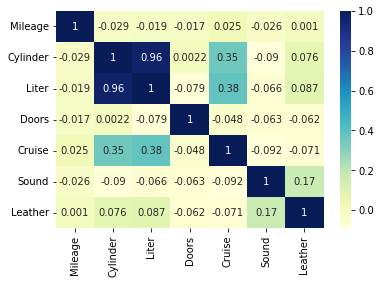

In [ ]:
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')# passing Categorical column
enc_df = pd.DataFrame(enc.fit_transform(df[['Make',	'Model','Trim','Type']]).toarray())# merge with remainiing dataset
X_encode = X.join(enc_df)
X_encode.head(5)

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,0,1,2,...,80,81,82,83,84,85,86,87,88,89
0,8221,6,3.1,4,1,1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9135,6,3.1,4,1,1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13196,6,3.1,4,1,1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16342,6,3.1,4,1,0,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,19832,6,3.1,4,1,0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split( X_encode, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9911247419737124

In [ ]:
# Visualising the data in Higher Dimensions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA() )])
Xt = pipe.fit_transform(X)


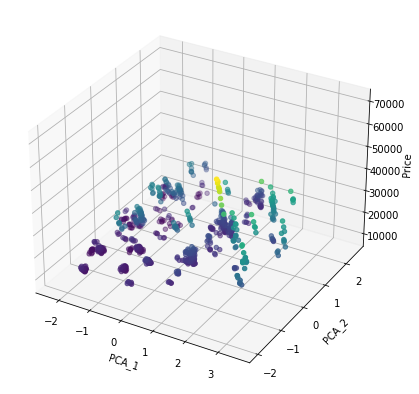

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

#creating plot
plot = ax.scatter3D(Xt[:,0],Xt[:,1], y, c=y)
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('Price')
plt.show()